<a href="https://colab.research.google.com/github/Gopika-C/New-Project/blob/main/Copy_of_Intrusionnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required packages for this module
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import json
jsonpath=Path('/content/drive/MyDrive/Mini Project/datasetnew.json')
with jsonpath.open('r',encoding='utf-8')as dat_f:
  dat=json.loads(dat_f.read())
  df=pd.json_normalize(dat)
  df.to_csv('/content/drive/MyDrive/Mini Project/Dataset.csv',encoding='utf-8',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Mini Project/logdataset1.csv")
data

,modload_count,process_path,alert_type,sensor_criticality,@timestamp,report_score,watchlist_id,sensor_id,feed_name,created_time,...,interface_ip,segment_id,total_hosts,feed_id,status,os_type,@version,childproc_count,unique_id,feed_rating
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.856Z,40.0,CVE-2016-4171,322.0,nvd,2019-11-29T12:11:06.587Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,c9845596-2a1c-40fa-ba73-1a3cb250e988,3.0
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.856Z,40.0,CVE-2016-4181,322.0,nvd,2019-11-29T12:11:06.589Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,a3e78117-f02b-4a58-9194-39b8c153b1fb,3.0
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.856Z,40.0,CVE-2016-4138,322.0,nvd,2019-11-29T12:11:06.413Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,cf8a47c0-fe5e-4738-a0c4-841c04bd4e85,3.0
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.856Z,40.0,CVE-2016-4128,322.0,nvd,2019-11-29T12:11:06.406Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,9c819b01-6e5c-4985-92a6-132c98cb6f63,3.0
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.856Z,40.0,CVE-2016-4227,322.0,nvd,2019-11-29T12:11:06.41Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,7cbfe316-3569-4a6b-8b30-efd474b13cc6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.856Z,40.0,CVE-2016-6924,322.0,nvd,2019-11-29T12:11:06.398Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,7511c8ec-d15e-4856-b2ea-ae52ccf51b39,3.0
2368,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.856Z,40.0,CVE-2016-4235,322.0,nvd,2019-11-29T12:11:06.592Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,0de5284e-30c9-4f12-9816-e64a3271e0af,3.0
2369,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.855Z,40.0,CVE-2016-4166,322.0,nvd,2019-11-29T12:11:06.595Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,f13e5381-0167-4c2e-9d3d-211480c7cd3a,3.0
2370,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3.0,2019-11-29T12:18:17.855Z,40.0,CVE-2016-4174,322.0,nvd,2019-11-29T12:11:06.62Z,...,172.20.7.254,-1.223531e+09,198.0,18.0,Unresolved,windows,1.0,2.0,884fe9a3-b70c-49f4-9299-230b73c63cf9,3.0


In [ ]:
ds=data[['process_path','alert_type','@timestamp','watchlist_id','tags','report_score','alert_severity']]

In [ ]:
ds

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27.0
1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27.0
2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27.0
3,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27.0
4,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27.0
...,...,...,...,...,...,...,...
2495,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0995,['carbonblack'],40,27.0
2496,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-1031,['carbonblack'],40,27.0
2497,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],40,27.0
2498,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],40,27.0


In [ ]:
ds.dtypes

process_path       object
alert_type         object
@timestamp         object
watchlist_id       object
tags               object
report_score        int64
alert_severity    float64
dtype: object

In [ ]:
df=ds

In [ ]:
#Preprocessing
#applying the labelencoder for datatype convertion
from sklearn.preprocessing  import LabelEncoder
label_encoder=LabelEncoder()
df['process_path']=label_encoder.fit_transform(df['process_path'].astype(str))
df['alert_type']=label_encoder.fit_transform(df['alert_type'].astype(str))
df['watchlist_id']=label_encoder.fit_transform(df['watchlist_id'].astype(str))
df['tags']=label_encoder.fit_transform(df['tags'].astype(str))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df.dtypes

process_path        int64
alert_type          int64
@timestamp         object
watchlist_id        int64
tags                int64
report_score        int64
alert_severity    float64
dtype: object

In [ ]:
pd.to_datetime(df['@timestamp'])

0      2019-11-29 12:18:17.856000+00:00
1      2019-11-29 12:18:17.856000+00:00
2      2019-11-29 12:18:17.856000+00:00
3      2019-11-29 12:18:17.856000+00:00
4      2019-11-29 12:18:17.856000+00:00
                     ...               
2495   2019-11-27 03:12:01.144000+00:00
2496   2019-11-27 03:12:01.143000+00:00
2497   2019-11-27 03:12:01.143000+00:00
2498   2019-11-27 03:12:01.143000+00:00
2499   2019-11-27 19:34:13.902000+00:00
Name: @timestamp, Length: 2500, dtype: datetime64[ns, UTC]

In [ ]:
df['@timestamp']=label_encoder.fit_transform(df['@timestamp'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,4,0,35,23,0,40,27.0
1,4,0,35,25,0,40,27.0
2,4,0,35,20,0,40,27.0
3,4,0,35,19,0,40,27.0
4,4,0,35,28,0,40,27.0
...,...,...,...,...,...,...,...
2495,4,0,1,10,0,40,27.0
2496,4,0,0,17,0,40,27.0
2497,4,0,0,32,0,40,27.0
2498,4,0,0,32,0,40,27.0


In [ ]:
df.dtypes

process_path        int64
alert_type          int64
@timestamp          int64
watchlist_id        int64
tags                int64
report_score        int64
alert_severity    float64
dtype: object

In [ ]:
df.loc[(df['report_score'] >=10) & (df['report_score'] <= 39), 'class'] = "LowRisk"  
df.loc[(df['report_score'] >=40) & (df['report_score'] <= 69), 'class'] = "MediumRisk" 
df.loc[(df['report_score'] >=70) & (df['report_score'] <= 89), 'class'] = "HighRisk" 
df.loc[(df['report_score'] >=90) & (df['report_score'] <= 100), 'class'] = "Critical" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
def cdc(report_score):
    if report_score=='LowRisk':
        return 0
    elif report_score == 'MediumRisk':
        return 1
    elif report_score =='HighRisk':
        return 2
    elif report_score=='Critical':
        return 3

In [ ]:
df['class'] = df['class'].apply(cdc)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
0,4,0,35,23,0,40,27.0,1
1,4,0,35,25,0,40,27.0,1
2,4,0,35,20,0,40,27.0,1
3,4,0,35,19,0,40,27.0,1
4,4,0,35,28,0,40,27.0,1
...,...,...,...,...,...,...,...,...
2495,4,0,1,10,0,40,27.0,1
2496,4,0,0,17,0,40,27.0,1
2497,4,0,0,32,0,40,27.0,1
2498,4,0,0,32,0,40,27.0,1


In [ ]:
df.dtypes

process_path        int64
alert_type          int64
@timestamp          int64
watchlist_id        int64
tags                int64
report_score        int64
alert_severity    float64
class               int64
dtype: object

In [ ]:
x=df.drop(["class","report_score"],axis=1)
y=df["class"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df)
x_df=sc.transform(df)




In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

array([[ 0.18203151,  0.        , -0.84333347, ..., -0.31163403,
        -0.11318074, -0.09188347],
       [ 0.18203151,  0.        , -0.12302815, ..., -0.31163403,
        -0.11318074, -0.09188347],
       [ 0.18203151,  0.        , -0.12302815, ..., -0.31163403,
        -0.11318074, -0.09188347],
       ...,
       [ 0.18203151,  0.        , -0.12302815, ..., -0.31163403,
        -0.11318074, -0.09188347],
       [ 0.18203151,  0.        ,  0.95742983, ..., -0.31163403,
        -0.11318074, -0.09188347],
       [ 0.18203151,  0.        ,  0.59727717, ..., -0.31163403,
        -0.11318074, -0.09188347]])

In [ ]:

#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'poly',degree=4)
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)


In [ ]:

sv.score(x_test,y_test)

0.998

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)

In [ ]:
knn_clf.score(x_test,y_test)

0.998

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)



In [ ]:
rf.score(x_test,y_test)

1.0

In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predictions = gnb.predict(x_test)

In [ ]:
gnb.score(x_test,y_test)

1.0

In [ ]:
#Applying logeistic regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)



In [ ]:
lr.score(x_test,y_test)

0.998

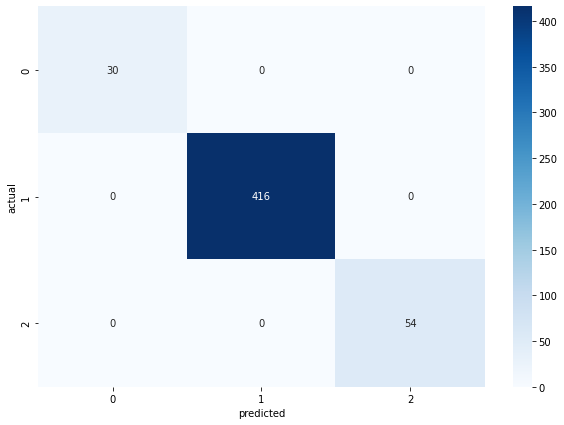

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00       416
           2       1.00      1.00      1.00        54

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
df["class"].value_counts()

1    2145
2     214
0     136
3       5
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=2)
x_train_os,y_train_os=smote.fit_resample(x_train,y_train)

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train_os,y_train_os)
y_predrfc=rfc.predict(x_test)


In [ ]:
rfc.score(x_test,y_test)

1.0

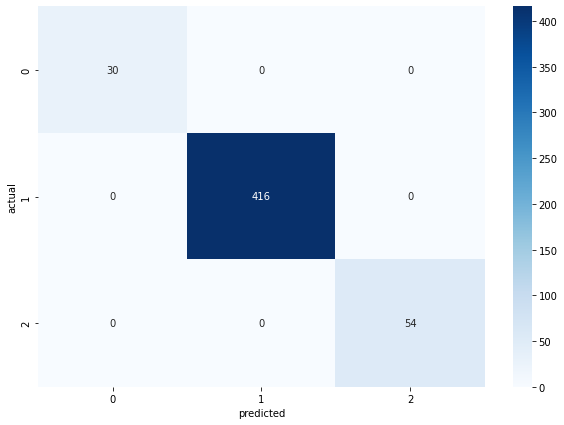

In [ ]:
y_predt=rfc.predict(x_test)
confusion3=confusion_matrix(y_test,y_predt)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
low=df[df["class"]==0]
medium=df[df["class"]==1]
avg=df[df["class"]==2]
high=df[df["class"]==3]

In [ ]:
n=len(medium)

In [ ]:
low_over = low.sample(n, replace=True)
avg_over = avg.sample(n, replace=True)
high_over = high.sample(n, replace=True)

In [ ]:
low_over.shape
avg_over.shape
high_over.shape

(2145, 8)

In [ ]:
data_over = pd.concat([low_over,medium,avg_over,high_over], axis=0)

In [ ]:
data_over["class"].value_counts()

0    2145
1    2145
2    2145
3    2145
Name: class, dtype: int64

In [ ]:
data_over

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
1022,4,0,28,26,0,15,27.0,0
1660,4,0,27,21,0,28,18.9,0
50,4,0,27,21,0,28,18.9,0
1396,4,0,27,21,0,28,18.9,0
746,4,0,27,21,0,28,18.9,0
...,...,...,...,...,...,...,...,...
2493,1,0,21,2,0,100,67.5,3
2499,1,0,22,2,0,100,67.5,3
1877,4,0,26,32,0,96,27.0,3
902,4,0,32,8,0,99,27.0,3


In [ ]:
data_over=data_over.sample(frac=1)

In [ ]:
x=data_over.drop(["class","report_score"],axis=1)
y=data_over["class"]

In [ ]:
x.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)
data_over.reset_index(inplace=True, drop=True)

In [ ]:
data_over

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
0,2,0,33,39,0,85,57.375,2
1,4,0,28,27,0,88,27.000,2
2,1,0,20,2,0,95,67.500,3
3,4,0,28,33,0,40,27.000,1
4,1,0,21,2,0,100,67.500,3
...,...,...,...,...,...,...,...,...
8575,4,0,34,27,0,40,27.000,1
8576,2,0,33,39,0,85,57.375,2
8577,4,0,32,8,0,99,27.000,3
8578,2,0,33,39,0,85,57.375,2


In [ ]:

sc=StandardScaler()
sc.fit(data_over/)
x_std=sc.transform(data_over)


SyntaxError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

ValueError: ignored

In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_prednb=clf.predict(x_test)
clf.score(x_test,y_test)

0.2338568935427574

In [ ]:
#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'poly',degree=3, gamma='auto')
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)
sv.score(x_test,y_test)

0.22745782431646305

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)
knn_clf.score(x_test,y_test)

0.24607329842931938

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)
rf.score(x_test,y_test)


0.2315299592786504

In [ ]:
#Applying logeistic regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
lr.score(x_test,y_test)


0.2344386271087842

In [ ]:
#Applying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predlr=dt.predict(x_test)
dt.score(x_test,y_test)



0.23502036067481094

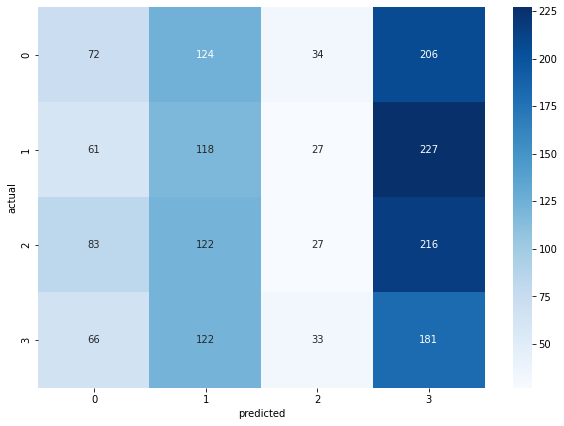

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:

print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       434
           1       0.73      0.84      0.78       432
           2       0.90      0.82      0.85       433
           3       0.93      1.00      0.97       420

    accuracy                           0.86      1719
   macro avg       0.87      0.86      0.86      1719
weighted avg       0.87      0.86      0.86      1719



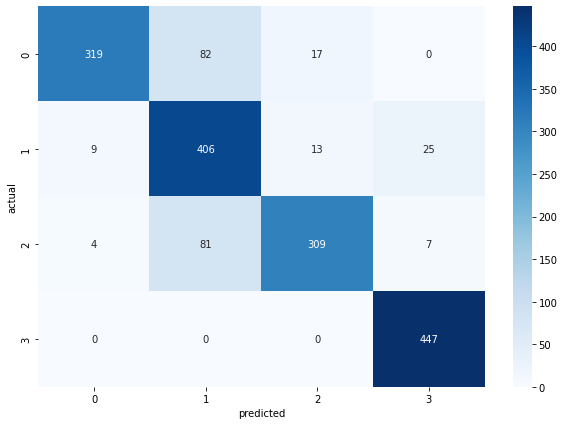

In [ ]:
#for decision tree
y_pred5=dt.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred5)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("Classification report of Decision tree \n")
print(classification_report(y_test,y_pred5))

Classification report of Decision tree 

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       418
           1       0.71      0.90      0.79       453
           2       0.91      0.77      0.84       401
           3       0.93      1.00      0.97       447

    accuracy                           0.86      1719
   macro avg       0.88      0.86      0.86      1719
weighted avg       0.88      0.86      0.86      1719



In [ ]:
import pickle

In [ ]:

# save the model to disk
filename = 'picklemodel.sav'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8609656777196044
